In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


#1. Анализ целевой переменной Y с точки зрения статистики

**Загружаем набор данных**

In [4]:
df = pd.read_csv('/content/income.csv')

In [ ]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [5]:
for column in df.columns:
  print(f'колонка: {column}')

колонка: age
колонка: workclass
колонка: education
колонка: education-num
колонка: marital-status
колонка: occupation
колонка: relationship
колонка: race
колонка: sex
колонка: capital-gain
колонка: capital-loss
колонка: hours-per-week
колонка: native-country
колонка: income >50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  31978 non-null  object
 13  income >50K     32561 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


**Проверка на наличие пропущенных значений и работа с пропусками для числовых:**

In [7]:

# Проверка на пропущенные значения
print(df.isnull().sum())# пропускные значения имеются в workclass, occupation, native-country

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income >50K          0
dtype: int64


In [8]:
df_test_nan = df.copy()

In [9]:
print(df_test_nan.isnull().sum())

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income >50K          0
dtype: int64


In [10]:
df_drop = df_test_nan.dropna()
print("\n# Удаление строк с пропусками")
print(df_drop.isnull().sum()) # пропусков н


# Удаление строк с пропусками
age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income >50K       0
dtype: int64


In [11]:
# Вариант 2: Заполнение пропусков медианой
df_median = df_test_nan.copy()

df_median.workclass = df_median.workclass.fillna(df_median.workclass.mode()[0])
df_median.occupation = df_median.occupation.fillna(df_median.occupation.mode()[0])
df_median = df_median.rename(columns={'native-country': 'native_country'})
df_median.native_country = df_median.native_country.fillna(df_median.native_country.mode()[0]) # я это сделал, потому что ко
print("\n# Заполнение пропусков модой")
print(df_median.isnull().sum()) # пропусков нет


# Заполнение пропусков модой
age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native_country    0
income >50K       0
dtype: int64


**Выбираем целвую переменную**

Таким образом, исходя из предоставленных данных, наиболее логичным выбором для целевой переменной является "income >50K". Этот выбор позволяет нам построить модель, которая сможет предсказывать, принадлежит ли сотрудник к группе с высоким доходом на основе других характеристик.

In [12]:
Y = df['income >50K']
X = df.drop('income >50K', axis=1)

**Графический анализ**

In [13]:
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols


,age,education-num,capital-gain,capital-loss,hours-per-week
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40
...,...,...,...,...,...
32556,27,12,0,0,38
32557,40,9,0,0,40
32558,58,9,0,0,40
32559,22,9,0,0,20


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


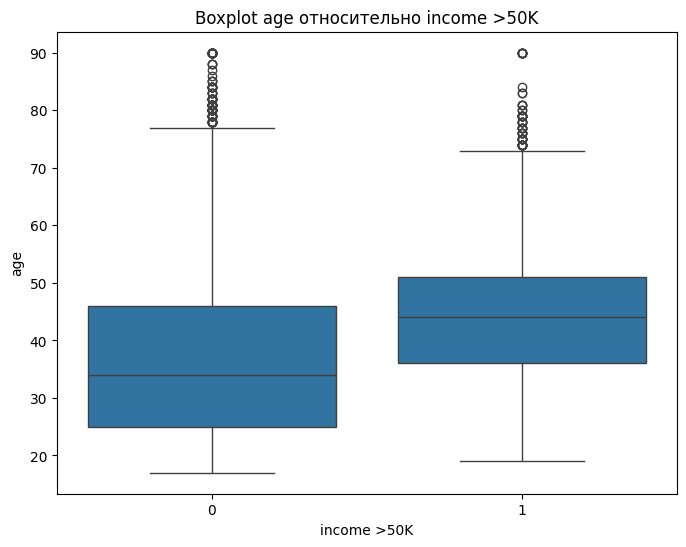

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


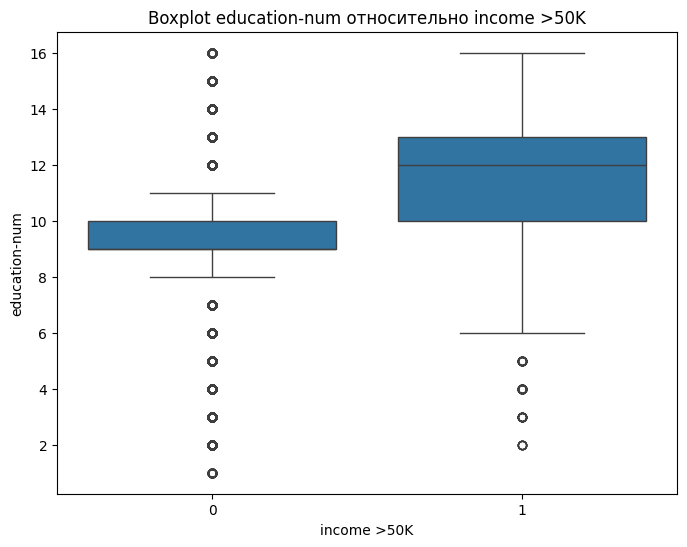

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


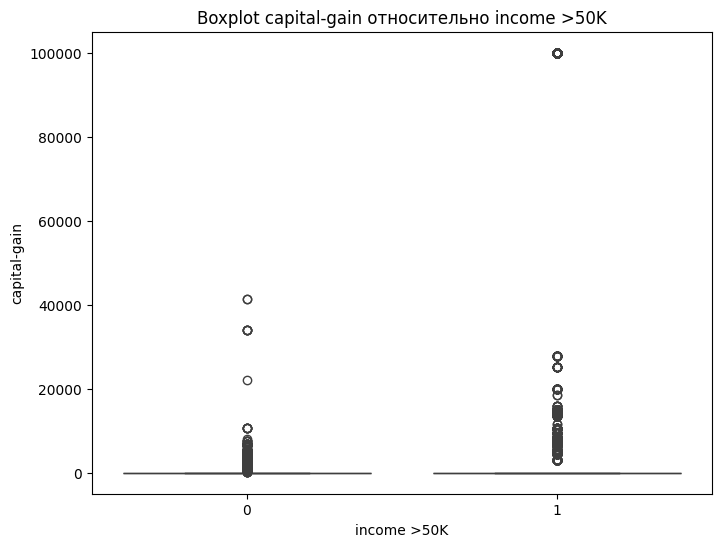

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


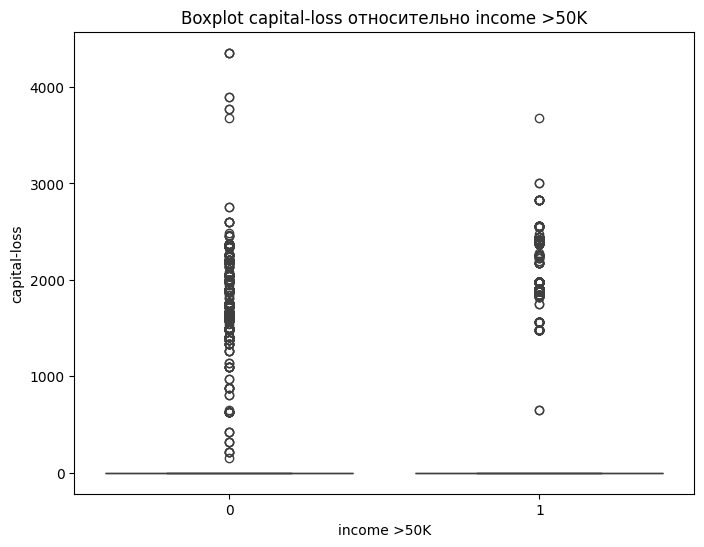

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


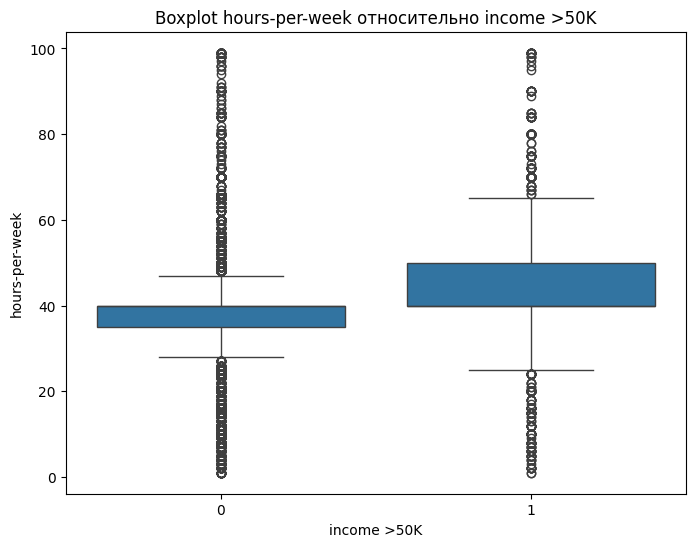

In [14]:
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='income >50K', y=col, data=df)
    plt.title(f'Boxplot {col} относительно income >50K')
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

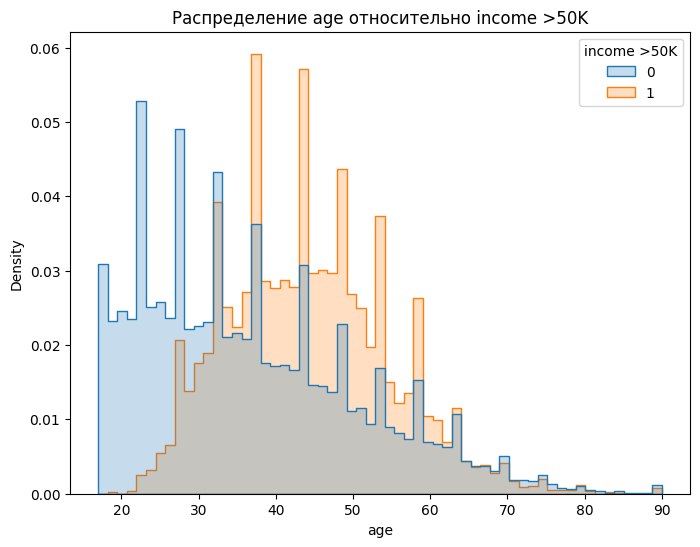

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

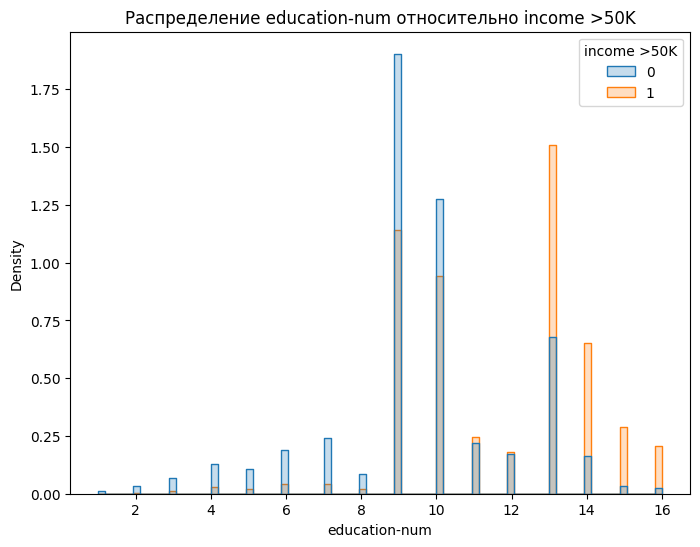

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

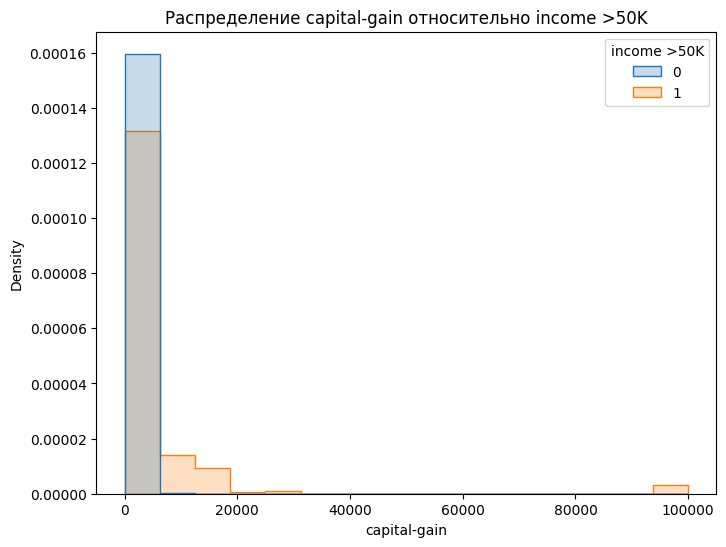

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

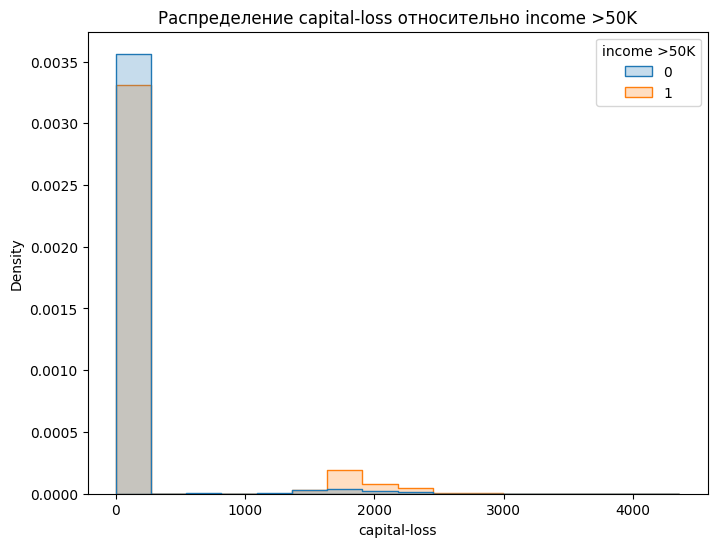

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

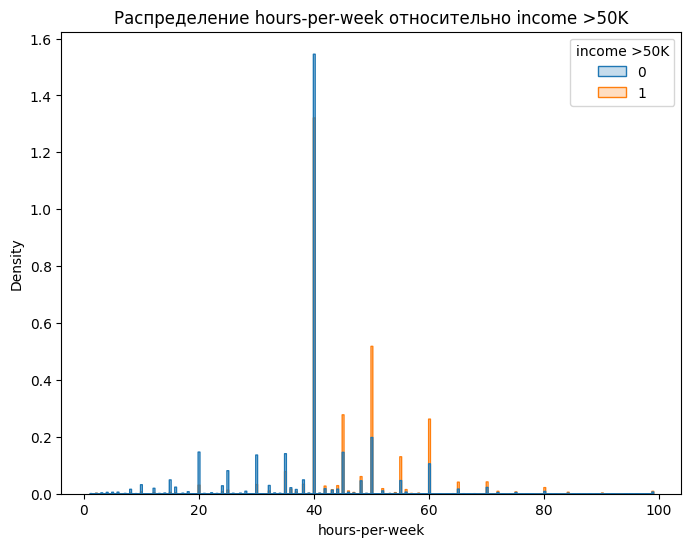

In [15]:
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='income >50K', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно income >50K')
    plt.show()

#Боксплот

1) Медианный возраст людей с доходом выше 50 тысяч долларов выше, чем у тех, чей доход ниже этого значения. Это говорит о том, что, в среднем, люди с более высоким доходом старше. Размах данных по возрасту в обеих группах примерно одинаков. Это означает, что в обеих группах есть как молодые, так и пожилые люди.На графике присутствуют выбросы, особенно в группе с доходом выше 50 тысяч долларов. Это могут быть, например, молодые предприниматели с очень высоким доходом или пожилые люди, продолжающие работать на высоких должностях

2) Медианное количество лет образования у людей с доходом выше 50 тысяч долларов выше, чем у тех, чей доход ниже этого значения. Это говорит о том, что, в среднем, люди с более высоким доходом имеют более высокий уровень образования.
Размах данных по уровню образования в обеих группах примерно одинаков. Это означает, что в обеих группах есть люди с различным уровнем образования. На графике присутствуют выбросы, особенно в группе с доходом выше 50 тысяч долларов. Это могут быть, например, люди с очень высоким уровнем образования, но низким доходом по каким-то причинам, или наоборот, люди с низким уровнем образования, но высоким доходом благодаря другим факторам.

3) По данному боксплоту хочу объяснить про маленькое расстояние между усиками.
Во-первых, преобладает количество людей не имеющих капитального роста. Во-вторых, несмотря на то, что большинство наблюдений сосредоточено вблизи нуля, несколько наблюдений с очень большими значениями капитального прироста (выбросы) значительно увеличивают масштаб оси Y. А так хочется сказать, что значительная часть людей не имеет капитального прироста. Большинство людей в обеих группах (с доходом выше и ниже 50 тысяч долларов) не имеют значительного капитального прироста.
Выбросы сильно влияют на распределение. Несколько наблюдений с очень большими значениями капитального прироста искажают общую картину распределения.

4) Вероятно, в данных преобладает количество людей, не имеющих капитальных потерь или имеющих очень небольшие потери. Несмотря на то, что большинство наблюдений сосредоточено вблизи нуля, несколько наблюдений с очень большими значениями капитальных потерь (выбросы) значительно увеличивают масштаб оси Y.
Большинство людей в обеих группах (с доходом выше и ниже 50 тысяч долларов) не имеют значительных капитальных потерь.
Выбросы сильно влияют на распределение : несколько наблюдений с очень большими значениями капитальных потерь искажают общую картину распределения.
Слабая связь между капитальными потерями и доходом: на основе этого боксплота сложно сделать однозначные выводы о связи между капитальными потерями и уровнем дохода.

5) Разница в количестве рабочих часов: медианное количество рабочих часов в неделю у людей с доходом выше 50 тысяч долларов выше, чем у тех, чей доход ниже этого значения. Это говорит о том, что, в среднем, люди с более высоким доходом работают больше часов.
Разброс данных: размах данных по количеству рабочих часов в обеих группах достаточно большой. Это означает, что в обеих группах есть люди, работающие как очень мало, так и очень много часов.
Выбросы: на графике присутствуют выбросы, особенно в группе с доходом выше 50 тысяч долларов. Это могут быть, например, люди, работающие на очень высокооплачиваемых должностях с ненормированным рабочим днем, или наоборот, люди с высоким доходом от инвестиций, работающие минимальное количество часов.

#Гистограммы

1) Для обеих групп наблюдается пик в возрастной категории около 40 лет. Это может свидетельствовать о том, что именно в этом возрасте люди наиболее активно зарабатывают.

2)Для обеих групп наблюдается пик в районе 9-10 лет образования. Это может указывать на то, что большинство людей в выборке имеют среднее образование.
Сдвиг вправо для группы с высоким доходом: распределение уровня образования для группы с доходом более 50 тысяч долларов несколько смещено вправо по сравнению с группой с более низким доходом. Это означает, что среди людей с высокими доходами больше тех, кто имеет более высокий уровень образования.

3) Для обеих групп характерно большое количество наблюдений с нулевым или очень небольшим капитальным приростом.

4) Для обеих групп характерно большое количество наблюдений с нулевыми или очень небольшими капитальными потерями. Это может свидетельствовать о том, что либо большая часть населения не инвестирует в активы, приносящие убытки, либо период наблюдения был недостаточно длительным для получения значительных убытков от инвестиций.

5) Распределение количества рабочих часов для группы с доходом более 50 тысяч долларов несколько смещено вправо по сравнению с группой с более низким доходом. Это означает, что среди людей с высокими доходами больше тех, кто работает больше часов в неделю.

In [16]:
# Описательная статистика для числовых переменных, разделенная по целевой переменной
desc_stats_numeric = df.groupby('income >50K')[df.select_dtypes(include=[np.number]).columns].describe()

# Описательная статистика для категориальных переменных, разделенная по целевой переменной
desc_stats_categorical = df.groupby('income >50K')[df.select_dtypes(include=['object']).columns].describe()

# Описание полученных результатов

In [17]:
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('income >50K')[col].describe())
    print("\n" + "="*50 + "\n")

Описательная статистика для age:

               count       mean        std   min   25%   50%   75%   max
income >50K                                                             
0            24720.0  36.783738  14.020088  17.0  25.0  34.0  46.0  90.0
1             7841.0  44.249841  10.519028  19.0  36.0  44.0  51.0  90.0


Описательная статистика для education-num:

               count       mean       std  min   25%   50%   75%   max
income >50K                                                           
0            24720.0   9.595065  2.436147  1.0   9.0   9.0  10.0  16.0
1             7841.0  11.611657  2.385129  2.0  10.0  12.0  13.0  16.0


Описательная статистика для capital-gain:

               count         mean           std  min  25%  50%  75%      max
income >50K                                                                 
0            24720.0   148.752468    963.139307  0.0  0.0  0.0  0.0  41310.0
1             7841.0  4006.142456  14570.378951  0.0  0.0  0.0  0.0 

In [18]:

print("\nКатегориальные переменные:")
desc_stats_categorical


Категориальные переменные:


workclass                        education                    \
                count unique      top   freq     count unique        top   
income >50K                                                                
0               23075      8  Private  17733     24720     16    HS-grad   
1                7650      6  Private   4963      7841     15  Bachelors   

                  marital-status         ...   race           sex         \
             freq          count unique  ...    top   freq  count unique   
income >50K                              ...                               
0            8826          24720      7  ...  White  20699  24720      2   
1            2221           7841      7  ...  White   7117   7841      2   

                         native-country                               
              top   freq          count unique            top   freq  
income >50K                                                           
0            Male  15128          24283     41  United-States  21999  
1            Male   6662           7695     39  United-States   7171  

[2 rows x 32 columns]

In [19]:
pd.set_option('display.max_colwidth', None)

# Выбираем интересующие нас столбцы
categorical_cols = ['marital-status', 'race']
categorical_df = desc_stats_categorical[categorical_cols]

# Подсчитываем частоту уникальных значений
for col in categorical_cols:
    print(f"Распределение по столбцу {col}:")
    print(categorical_df[col].value_counts())
    print("\n")

Распределение по столбцу marital-status:
count  unique  top                 freq 
7841   7       Married-civ-spouse  6692     1
24720  7       Never-married       10192    1
Name: count, dtype: int64


Распределение по столбцу race:
count  unique  top    freq 
7841   5       White  7117     1
24720  5       White  20699    1
Name: count, dtype: int64




# Категориальные переменные

1. Workclass:

 - В группе с зарлпатой меньше 50 тысяч (17733 из 23075)
 - В группе с зарплайто больше 50 тысяч (4963 из 7650)

 2. Education:
 - В группе с зарплатой меньше 50 тысяч преобладают с образованием старшей школы(8826 из 24720)
 - В группе с зарплатой больше 50 тысяч преобладают с образование бакалавра (2221 из 7659)

 3. Sex:
 - В обеих группах преобладает "male", однако в группе с зарплатой выше 50 тысяч его доля меньше (6662 из 7841 против 15128 из 24720 в группе с зарплатой ниже 50 тысяч).

 4. Native-country:
   - В обеих группах преобладает "United-States", однако в группе с зарплатой выше 50 тысяч его доля меньше (7171 из 7695 против 24283 из 21999 в группе с зарплатой ниже 50 тысяч).

 5. Marital-status:
  - В группе с зарплатой меньше 50 тысяч преобладают люди не женатые (10192 из 24720)
  - В группе с зарплатой больше 50 тысяч преобладают люди, которые состоят в гражданском браке (7117 из 7841)

6. Race:
 - - В обеих группах преобладает "White", однако в группе с зарплатой выше 50 тысяч его доля меньше (7117 из 7841 против 20699 из 24720 в группе с зарплатой ниже 50 тысяч).



# Числовые переменные

1. age:

 - Средний возраст людей, которые зарабатывают больше 50 тысяч рублей значительно больше по сравнению с противоположной группой (36 против 44)
 - Разброс возрастов в обеих группах примерно одинаковый, что свидетельствует о схожей вариабельности этого показателя.

2. Education-num:
 - Люди с более высоким доходом имеют более высокий уровень образования (11.6 лет) по сравнению с теми, у кого доход ниже (9.6 лет).
  -  Разница в стандартном отклонении между двумя группами очень небольшая. Это говорит о том, что разброс по количеству лет образования в обеих группах примерно одинаковый.

3. Capital-gain:
 - Люди с более высоким доходом имеют значительно более высокие средние значения капитальных прибылей (4006) по сравнению с теми, у кого доход ниже (148). Это говорит о том, что люди с более высоким доходом, как правило, получают больше прибыли от инвестиций.
 - В обеих группах есть люди, не имеющие капитальных прибылей (минимальное значение 0). Однако, максимальное значение для группы с высоким доходом значительно выше, что подтверждает наличие "выбросов" - очень больших значений, которые существенно влияют на среднее значение и стандартное отклонение.

4. Capital-loss:
 - Люди с более высоким доходом имеют значительно более высокие средние значения капитальных убытков (195) по сравнению с теми, у кого доход ниже (53). На первый взгляд, это может показаться противоречивым, ведь мы ожидали, что у более успешных людей будет меньше убытков. Однако это можно объяснить тем, что люди с высоким доходом, как правило, имеют более разнообразный инвестиционный портфель и, соответственно, подвержены большему количеству рисков.

 - Стандартное отклонение у группы с высоким доходом также выше (595), чем у группы с низким доходом (310). Это говорит о том, что среди людей с высоким доходом наблюдается еще больший разброс в значениях капитальных убытков, чем в значениях капитальных прибылей.

 5. Hours-per-week:
 -  Явное различие в средних значениях указывает на то, что люди с более высоким доходом склонны работать больше часов.
 - Небольшое различие в стандартных отклонениях (12 часов для группы с низким доходом и 11 часов для группы с высоким доходом) говорит о том, что разброс значений в обеих группах примерно одинаков.

# Вывод

На основе представленных данных можно сделать выводы о ключевых характеристиках, которые влияют на доход люденй. В частности:

- как мы видим, количество отработанных часов может коррелировать с доходом, хотя это не всегда прямая зависимость;
- люди с более высоким уровнем образования, как правило, имеют более высокий доход.


# Расчёт теста Пирсона


In [20]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,age,education-num,capital-gain,capital-loss,hours-per-week,income >50K
age,1.000000,0.036527,0.077674,0.057775,0.068756,0.234037
education-num,0.036527,1.000000,0.122630,0.079923,0.148123,0.335154
capital-gain,0.077674,0.122630,1.000000,-0.031615,0.078409,0.223329
capital-loss,0.057775,0.079923,-0.031615,1.000000,0.054256,0.150526
hours-per-week,0.068756,0.148123,0.078409,0.054256,1.000000,0.229689
income >50K,0.234037,0.335154,0.223329,0.150526,0.229689,1.000000


- Education-num и income >50K: Между уровнем образования (education-num) и доходом (income > 50K) существует умеренная положительная корреляция. Это означает, что чем выше уровень образования, тем выше вероятность заработать более 50 тысяч. Это классическая и ожидаемая связь, подтверждающая, что образование является одним из важнейших факторов, влияющих на уровень дохода

- Hours-pew-week и income >50K: Между количеством часов работы (hours-per-week) и доходом также наблюдается положительная корреляция. Это означает, что люди, работающие больше часов, в среднем имеют более высокий доход. Однако, стоит отметить, что эта связь может быть не прямой и зависеть от других факторов, таких как профессия, уровень образования и т.д.

-

#Машинное обучение

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [23]:
# Выбираем категориальные признаки
categorical_features = X.select_dtypes(include=['object', 'int64']).columns.tolist()

print("Категориальные признаки:", categorical_features)

Категориальные признаки: ['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']


In [24]:
# Создаем копию данных
X_processed = X.copy()

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True) # drop_first=True позволяет избе

In [25]:
X_processed

,age_18,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,age_27,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
32557,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32558,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32559,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [28]:
# Выбираем числовые признаки (учитывая возможные типы)
numeric_features = X_processed.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Проверяем, что список не пуст
if numeric_features:
    # Инициализируем scaler
    scaler = MinMaxScaler()

    # Применяем нормализацию
    X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])
else:
    print("В данных нет числовых столбцов.")

В данных нет числовых столбцов.


**Функция для обучения и оценки модели**

In [29]:
def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model

In [30]:
# Обучение модели
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.8742
Точность на тестовой выборке: 0.8698

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      4945
           1       0.78      0.64      0.70      1568

    accuracy                           0.87      6513
   macro avg       0.84      0.79      0.81      6513
weighted avg       0.86      0.87      0.87      6513



In [31]:
# Получение коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])

                Feature  Coefficient
234   capital-gain_8614     4.592094
255  capital-gain_99999     4.427397
243  capital-gain_14344     4.345826
237  capital-gain_10520     4.257464
228   capital-gain_7298     4.198922
..                  ...          ...
303   capital-loss_1944     0.000000
256    capital-loss_155     0.000000
186   capital-gain_2993     0.000000
312   capital-loss_2080     0.000000
220   capital-gain_6097     0.000000

[480 rows x 2 columns]


#Построение модели логистической регрессии для предсказания качества вина

**4.1 Кросс-валидация модели**

In [32]:

from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")

Средняя точность при кросс-валидации: 0.8699
Отклонение точности: 0.0038


In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

#Построение ROC-кривой

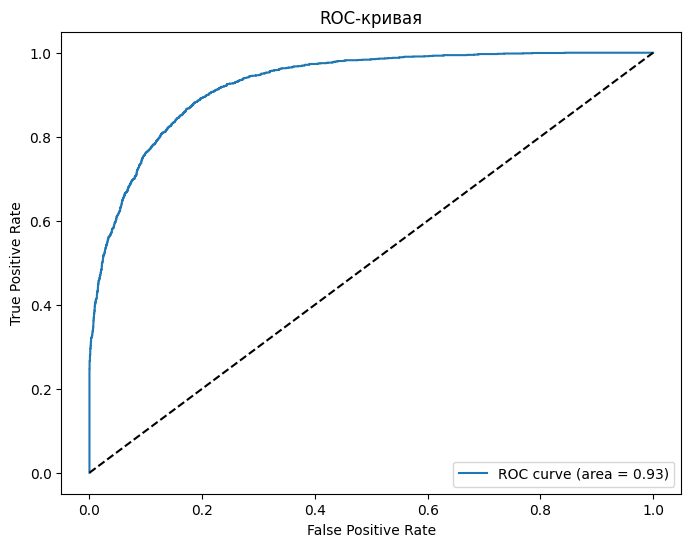

In [34]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()